# $$\textbf{Plummer sphere at equilibrium}$$

## <img src="treecode_Plummer_long_10000.gif" align="right" width="450px"/>

## Main features: 

The Plummer sphere has a density profile that goes as: 

$$\rho(r) = \frac{3M_{tot}}{4\pi b^2} \frac{1}{(1 + r^2/b^2)^{5/2}}$$

I f we integrate this from $0 \to r$ (r generic), we get the following mass profile:

$$M(r) = \frac{r^3 M_{tot}}{b^3} \frac{1}{(1 + r^2/b^2)^{3/2}}$$

## Coordinates of the particles: 

We can define:

$$\frac{M(r)}{M_{tot}} = c$$ 

where $c \in (0, 1)$ is the cumulative probability function $cdf(r)$.

By inverting the above relation, we find:
 
$$r = \frac{b}{({c^{-2/3}-1})^{1/2}}$$

The other two coordinates are the usual angular coordinates sampled in a spherical symmetry assumption: 

$$p(\phi) = \frac{1}{2\pi}$$

$$p(\theta) = \frac{\sin{\theta}}{2}$$

<br clear="right"/>

### Stability criteria: 

- If the system is at equilibrium we're not allowed to lose particles, e.g. their total energy must always be negative in order to preserve their bound state; 

- The dispersion $\sigma$ is the same for all three directions due to isotropy, and it's the main cause for stability, so we need to generate a velocity distribution that supports this constraint; 

### The velocity distribution:

To sample from the velocities distribution we cannot use standard methods of reverting the following integral $\int f d^{3}v $ to get the cumulative funtion. We therefore use the Monte Carlo rejection method to sample the escape velocity $\textbf{ratio}$, $q = \frac{v}{\sqrt{2\Psi}}$ from which to extract the $v$ module: 

$$F(\epsilon) = \int_{0}^{\epsilon} f(\epsilon) d^{3}v = \int_{0}^{\epsilon} 4\pi v^{2} f(\epsilon) dv \propto \int (\Psi - \frac{1}{2} v^{2})^{7/2} v^{2} dv = \int_{0}^{1} (1 - q^{2})^{7/2} q^{2} dq = \int_{0}^{1} f(q) dq$$.

See the below graph for a representation of the integral function $f(q)$. 
Once we have sampled $q$, we can easily convert into $v$: 

$$v = q \cdot \sqrt{2 \Phi}$$

with $\Phi$ the potential at fixed $r$, $\sqrt{2 \Phi}$ the $\textit{escape velocity}$, and $q < 1$, indicating that $v < v_{esc}$. 

In [194]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from tqdm.notebook import tqdm
from scipy.stats import uniform

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=False)
%config InlineBackend.figure_format='retina'

In [3]:
q_i = np.linspace(0, 1, 100)
fq_i = (1 - q_i**2)**(7/2) * q_i**2 

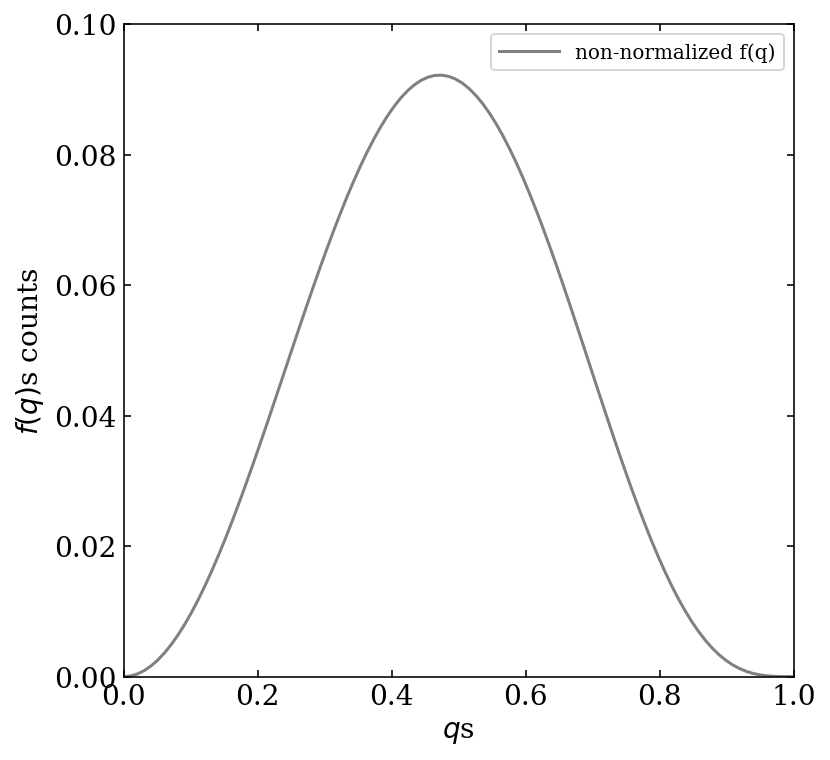

In [10]:
plt.figure(figsize = (6,6))

plt.plot(q_i, fq_i, label="non-normalized f(q)", color='grey')
plt.xlabel("$q$s")
plt.ylabel("$f(q)$s counts")
plt.ylim(0, 0.1)
plt.legend(loc='upper right', fontsize='medium')
plt.show()

Note that the function is not normalized, as we would expect for a probability distribution. 

### Setting the coordinates:

In [11]:
# set initial parameters: 

N = int(1e4)
M = 1 
m = M / N
b = 1

In [13]:
def find_rs(b, N): # this function finds the radii components reverting the cumulative function for R
    
    rad3_cb3 = (uniform.rvs(0, 1, size=N) * b**3)**(1/3)
    
    return rad3_cb3 / (1 - 1 / b**2 * rad3_cb3**2)**(1/2)

def find_pot(b, rs): # this function finds the potential, given the b parameter and radial distance
    
    return -1 * M / (b**2 + rs**2)**(1/2)

We can then initialize the positions of the particles inside the sphere:

In [15]:
# generate the distribution: 

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

rays = find_rs(b, N)

In [16]:
#convert to cartesian

x = rays * np.sin(thetas) * np.cos(phis)
y = rays * np.sin(thetas) * np.sin(phis)
z = rays * np.cos(thetas) 

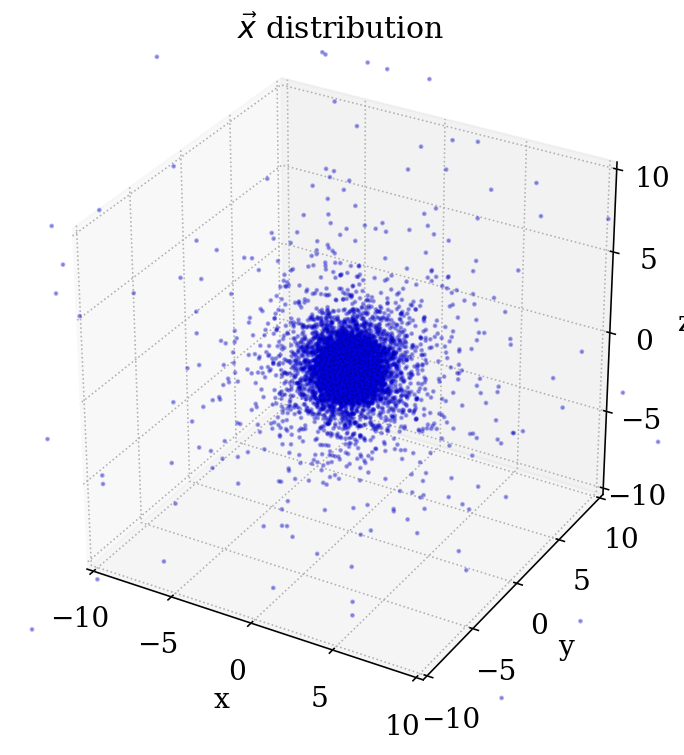

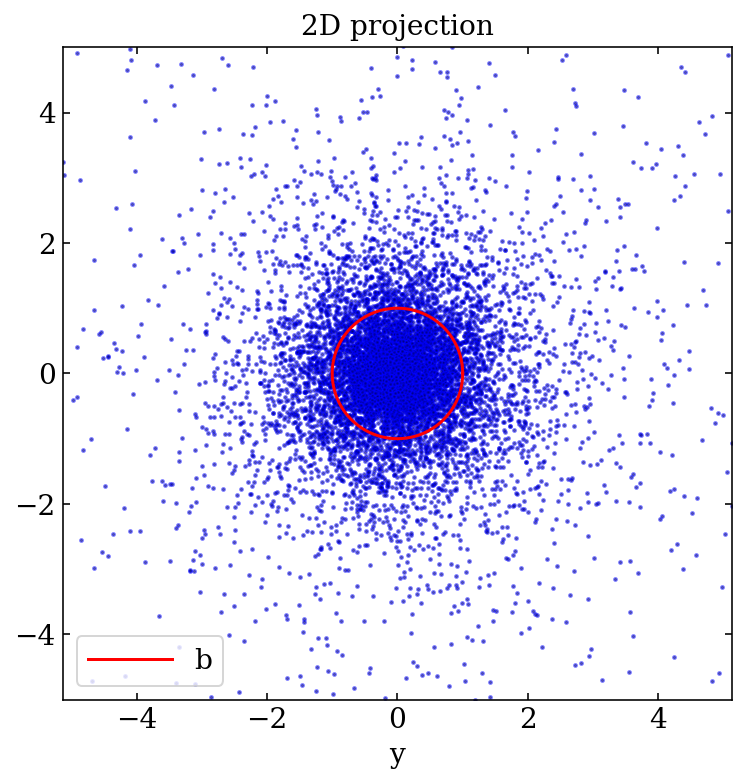

In [48]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = 'black', s=2, alpha=0.3)
ax.set_box_aspect([1,1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_title(r'$\vec{x}$ distribution', fontsize=15)
plt.show();

fig = plt.figure(figsize = (6,6))
theta = np.linspace(0 , 2 * np.pi, 150)
a = b * np.cos(theta)
c = b * np.sin(theta)
plt.scatter(x,y, c='black', s=2, alpha=0.5)
plt.plot(a, c, c='red', label='b')
plt.axis('equal')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('x')
plt.xlabel('y')
plt.title('2D projection')
plt.legend();

### Evaluating the potential:

The potential has the form: 

$$\Phi = -\frac{M}{(b^2+r^2)^{1/2}}$$

where we set $G = 1$ in our internal units.

In [18]:
# evaluate the potential Phi:

Phis = find_pot(b, rays)

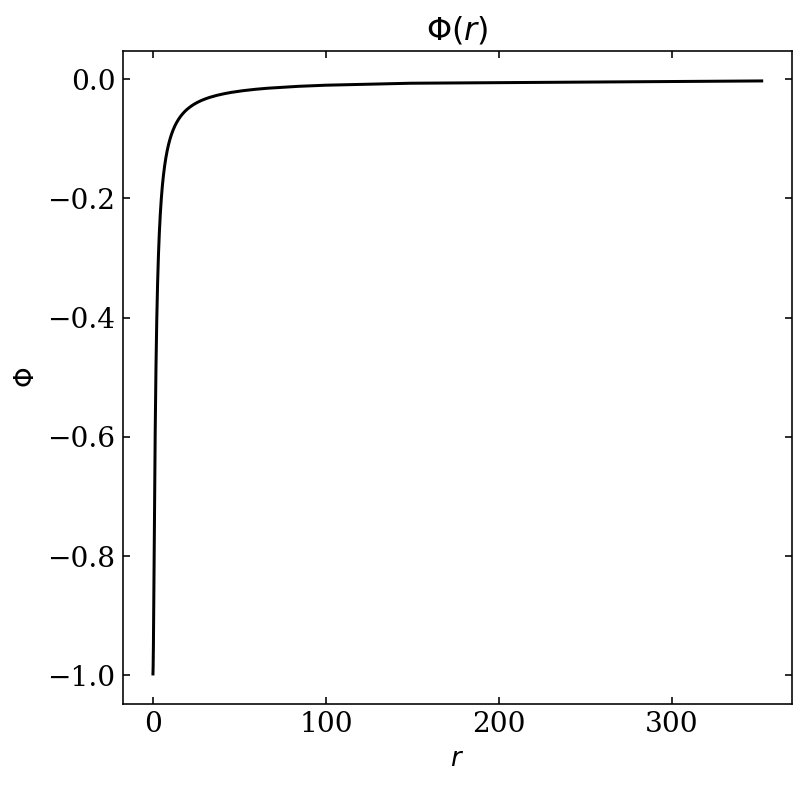

In [49]:
# plot:
plt.figure(figsize = (6,6))
plt.plot(rays[np.argsort(rays)], Phis[np.argsort(rays)], c='k')
plt.title(r"$\Phi(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel("$\Phi$", fontsize=13)
plt.margins(0.05, 0.05)
plt.show()

The relative potential is $\psi = \Phi + \Phi_0$, where I can decide to set $\Phi_0 = 0$ (initial potential).

### Escape velocity:

The escape velocity has the shape

$$v_{es} = \sqrt{2\psi}$$

In [25]:
# compute escape velocities: 

vs_esc = (2 * (-1 * Phis))**(1/2)

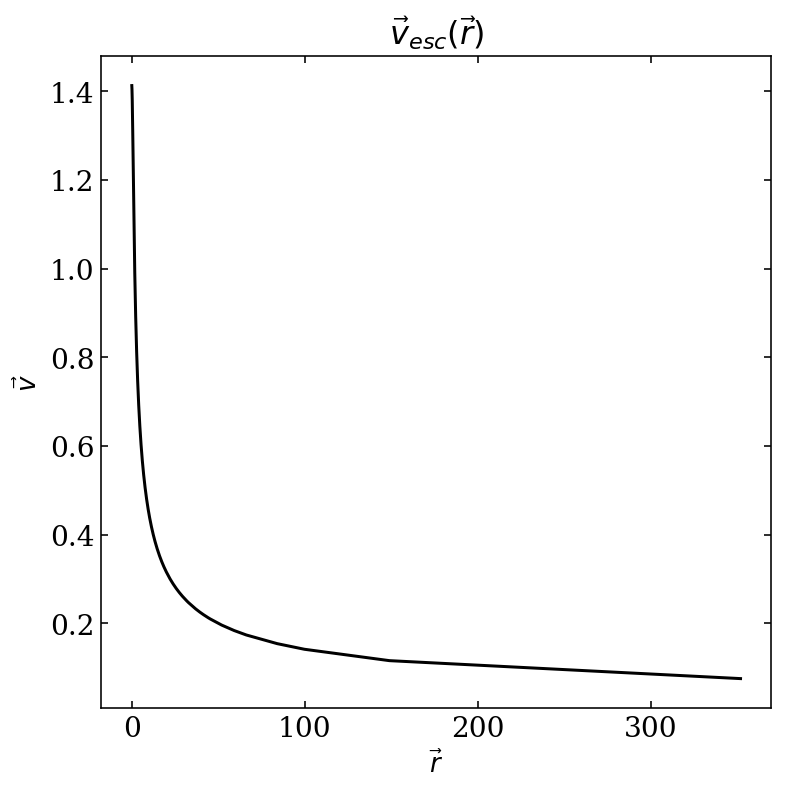

In [50]:
#plot: 
plt.figure(figsize = (6,6))
plt.plot(rays[np.argsort(rays)], vs_esc[np.argsort(rays)], c='k')
plt.title(r"$\vec{v}_{esc} (\vec{r})$", fontsize=16)
plt.xlabel(r"$\vec{r}$", fontsize=13)
plt.ylabel(r"$\vec{v}$", fontsize=13)
plt.margins(0.05, 0.05)
plt.show()

### Initialising the velocities:

We then have to finally initialize the velocities in order to set an equilibrium condition, and avoid collapsing the system. 

In [37]:
def f_q(q): 
    
    return  512 / (7 * np.pi) * (1 - q**2)**(7/2) * q**2

In [43]:
q_grid = np.linspace(0, 1, N)

In [44]:
def rejection_sampling(x, N):
    
    counts = 0
    y_i_ok = []
    
    while counts < N: 
    
        x_i = uniform.rvs(0, np.max(x))
        y_i = uniform.rvs(0, np.max(integral_function(x)))  # I generate the y_i points uniformly
    
        if y_i <= integral_function(x_i):
            
            y_i_ok.append(x_i)
            counts = counts + 1
            
        else: 
            continue
            
    return y_i_ok

In [45]:
y_i_ok = rejection_sampling(q_grid, N)

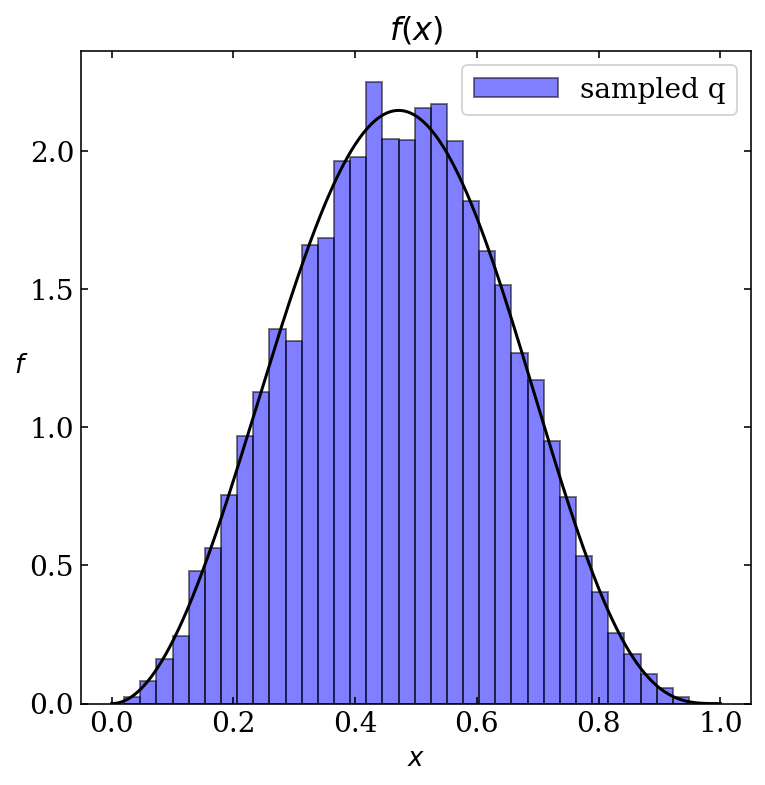

In [51]:
plt.figure(figsize = (6,6))
plt.plot(q_grid, f_q(q_grid), c='k')
plt.hist(y_i_ok, 35, density=True, color='blue', alpha=0.5, label='sampled q')
plt.title("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$f$", fontsize=13, rotation=0)
plt.margins(0.05, 0.05)
plt.legend();

In [52]:
vs = y_i_ok * vs_esc

In [53]:
# generate the velocities: 

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

vx = vs * np.sin(thetas) * np.cos(phis)
vy = vs * np.sin(thetas) * np.sin(phis)
vz = vs * np.cos(thetas)

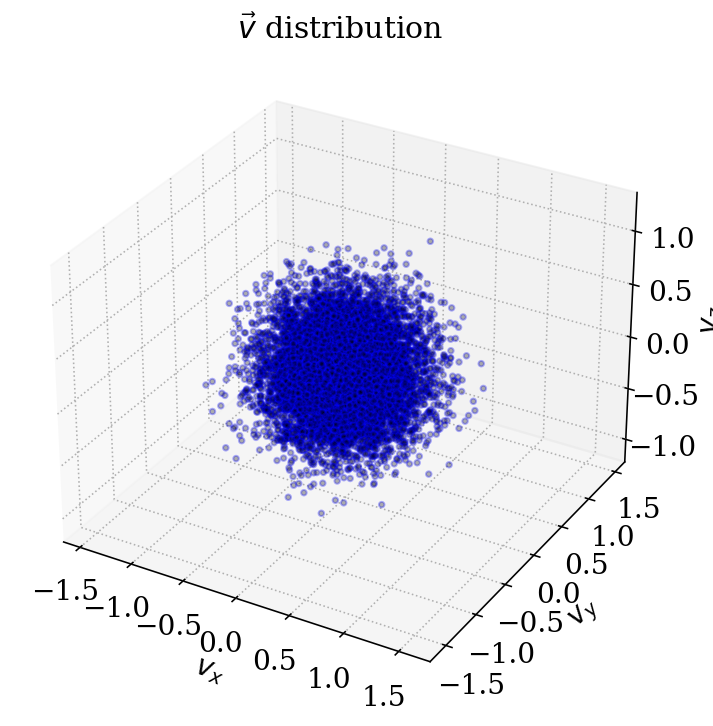

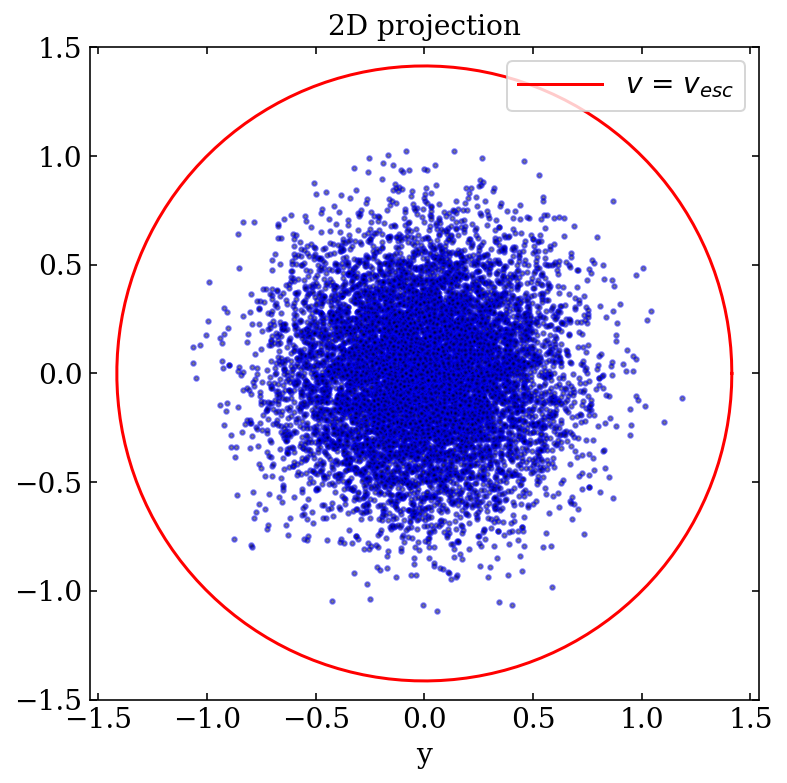

In [54]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(vx, vy, vz, c = 'black', s=7.5, alpha=0.3)
ax.set_aspect('equal')
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$v_z$')
ax.set_title(r'$\vec{v}$ distribution', fontsize=15)
#ax.set_xlim(-13, 13)
#ax.set_ylim(-13, 13)
#ax.set_zlim(-13, 13)
plt.show();

plt.figure(figsize = (6,6))
a = np.sqrt(2) * np.cos( theta )  # 1 is v = v_esc
c = np.sqrt(2) * np.sin( theta )
plt.scatter(vx,vy, c='black', s=5, alpha=0.5)
plt.plot(a, c, c='red', label='$v$ = $v_{esc}$')
plt.axis('equal')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('x')
plt.xlabel('y')
plt.title('2D projection')
plt.legend();

### Produce the input file:

Let's try to simulate:

In [19]:
'''
# open the file
file = open('plummer_sphere.txt', 'w')

# write the file
file.write(f'{N}\n')
file.write('3\n') # dimensions
file.write('0\n')

for i in range(N):
    file.write(f'{m}\n')

for i in range(N):
    file.write(f'{x[i]} {y[i]} {z[i]}\n')
    
for i in range(N):
    file.write(f'{vx[i]} {vy[i]} {vz[i]}\n')

# close the file
file.close()
'''

"\n# open the file\nfile = open('plummer_sphere.txt', 'w')\n\n# write the file\nfile.write(f'{N}\n')\nfile.write('3\n') # dimensions\nfile.write('0\n')\n\nfor i in range(N):\n    file.write(f'{m}\n')\n\nfor i in range(N):\n    file.write(f'{x[i]} {y[i]} {z[i]}\n')\n    \nfor i in range(N):\n    file.write(f'{vx[i]} {vy[i]} {vz[i]}\n')\n\n# close the file\nfile.close()\n"

In [20]:
def dyn_time(rho_0): 
    
    G = 1
    
    return np.sqrt(3 * np.pi / (16 * G * rho_0)) 

def coll_time(rho_0): 
    
    G = 1
    
    return np.sqrt(3 * np.pi / (32 * G * rho_0))

In [21]:
V_0 = 4/3 * np.pi * b**3
numb_density = N/V_0 
rho_0 = M/V_0
print('dynamical time:', dyn_time(rho_0), '\n')

t_sim = 16*dyn_time(rho_0)

dtime = 0.01 # Timestep: roughly the total time of simulation / number of frames that we want
eps = (1/numb_density)**(1/3) # Softening: roughly the radius associated to each particle
theta = 0.1 
tstop = t_sim # Total time of the simulation
dtout = 0.1

command = f'time ./treecode in=plummer_sphere.txt out=output_plummer.txt dtime={dtime} eps={eps} theta={theta} tstop={tstop} dtout={dtout} >snapshot.txt ; echo Process returned$?'
print('Terminal command line:\n', command)

dynamical time: 1.5707963267948963 

Terminal command line:
 time ./treecode in=plummer_sphere.txt out=output_plummer.txt dtime=0.01 eps=0.0748220385363649 theta=0.1 tstop=25.13274122871834 dtout=0.1 >snapshot.txt ; echo Process returned$?


# $$\textbf{"Data analysis"}$$

In [55]:
def Dataframe(namefile): 
    df = pd.read_csv(namefile, names=('1', '2', '3'), sep='\s+', skipinitialspace=True)
    return df

data = Dataframe("output_plummer_2.txt")
num_rows = len(data.index)
rows_label = [0 for n in range(num_rows)]
step = 3*N+3

for i in np.arange(0, num_rows, step=step):
    rows_label[i] = '# Particles'
for i in np.arange(1, num_rows, step=step):
    rows_label[i] = 'Dimensions'
for i in np.arange(2, num_rows, step=step):
    rows_label[i] = 'Time'

for n in range(N): # from 0 to 1999
    for i in np.arange(n+3, num_rows, step=step): # da 3 alla fine del dataframe al primo ciclo (primo valore di n)
        rows_label[i] = str(n+1)+' - mass'

for n in range(N): # from 0 to 1999
    for i in np.arange(n+N+3, num_rows, step=step): # da 3 alla fine del dataframe al primo ciclo (primo valore di n)
        rows_label[i] = str(n+1)+' - pos'
        
for n in range(N): # from 0 to 1999
    for i in np.arange(n+2*N+3, num_rows, step=step): # da 3 alla fine del dataframe al primo ciclo (primo valore di n)
        rows_label[i] = str(n+1)+' - vel'

data.index = rows_label

display(data)

,1,2,3
# Particles,10000.000000,NaN,NaN
Dimensions,3.000000,NaN,NaN
Time,0.000000,NaN,NaN
1 - mass,0.000100,NaN,NaN
2 - mass,0.000100,NaN,NaN
...,...,...,...
9996 - vel,-0.173781,0.339730,-0.578101
9997 - vel,-0.220398,-0.055873,-0.124918
9998 - vel,-0.431760,-0.370002,0.237296
9999 - vel,0.378580,0.449924,0.027530


In [56]:
#Slicing with the .iloc function
#NB: Notation is list[start:stop:step]

# Time #-----------------------------------------
Time = np.array(data.loc['Time', '1']).flatten()
print(f'The simulation consists in {len(Time)} time-steps.')

The simulation consists in 126 time-steps.


In [57]:
import os
from tqdm import tqdm
# Execute this cell just ONCE in order to put all the data in "position_list.txt", 
# so that the following analysis will be much much faster

pos_filename = 'position_list_long.txt'

if not os.path.exists(pos_filename):
    new_list = []
    for n in tqdm(range(1, N+1)):
        new_list.append((data.loc[str(n)+' - pos', '1'], 
                data.loc[str(n)+' - pos', '2'], 
                data.loc[str(n)+' - pos', '3'])) 
    np_list = np.array(new_list)
    list_reshaped = np_list.reshape(np_list.shape[0], -1)
    np.savetxt(pos_filename, list_reshaped)
else:
    print(f'"{pos_filename}" already exists in the folder!')

"position_list_long.txt" already exists in the folder!


In [58]:
# -------------------------- Loading the positions from the file --------------------------

load_list = np.loadtxt(pos_filename)
load_original_list = load_list.reshape(
    load_list.shape[0], load_list.shape[1] // len(Time), len(Time))

print(f'(# part., dim, t_steps) \n {np.shape(load_original_list)}')

_list = np.copy(load_original_list)

(# part., dim, t_steps) 
 (10000, 6, 126)


100%|████████████████████████████████████| 10000/10000 [00:10<00:00, 940.43it/s]


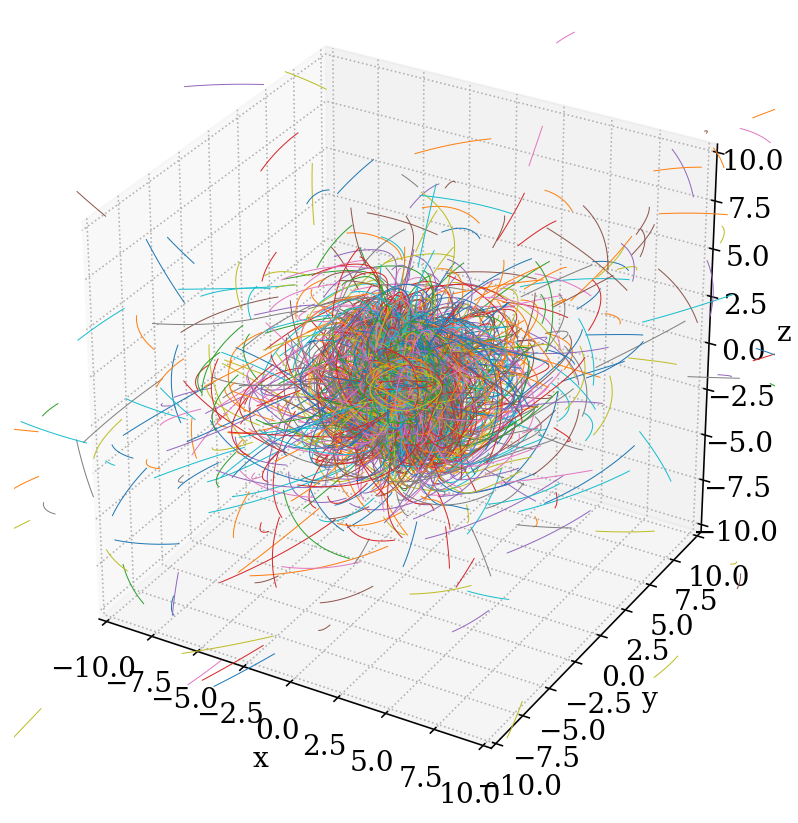

In [59]:
l=10

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-l, l)
ax.set_ylim(-l, l)
ax.set_zlim(-l, l)
ax.set_box_aspect([1,1,1])

for n in tqdm(range(N)):
    ax.plot(_list[n][0], _list[n][1], _list[n][2], linewidth=0.5) 

Very chaotic, as usual.

### Animation: 

Just skip this part if you're not interested in understanding the outstanding animation at the beginning of this notebook (credits: Nicolò Fiaba).

In [ ]:
def animate(i):
    m_1._offsets3d = (_list[:, 0, i:i+1].flatten(), _list[:, 1, i:i+1].flatten(), _list[:, 2, i:i+1].flatten())
#     m_2.set_data(x_cm_i[i:i+1], y_cm_i[i:i+1])
#     m_2.set_3d_properties(z_cm_i[i:i+1])
    ax.set_title('Plummer sphere at equilibrium \n Time = '+str("{:.1f}".format(Time[i]/dyn_time(rho_0)))+    
                 r' $T_{dyn}$    Number of points = '+str(N), fontsize=13)
    
    # Continuous rotation:
#     ax.view_init(elev=30, azim=i*(90/num_frames))


# The following part is used for rotation and/or zooming
"""
    if i<80:
        ax.view_init(elev=30, azim=45)
    elif i>=80 and i<=160:
#         ax.view_init(elev=30, azim=i*(90/(num_frames-80)))
        ax.set_xlim(-(10*(80/i)), (10*(80/i)))
        ax.set_ylim(-(10*(80/i)), (10*(80/i)))
        ax.set_zlim(-(10*(80/i)), (10*(80/i)))
    else:
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_zlim(-5, 5)
    return m_1, m_2
"""

In [ ]:

# ---------------------------------- Plot settings ------------------------------------------
a = 8 # x,y,z limit

plt.style.use('seaborn-darkgrid')
# %matplotlib notebook
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=30, azim=45) #Set initial camera view
fig.set_facecolor('white')

ax.set_xlim(-a, a)
ax.set_ylim(-a, a)
ax.set_zlim(-a, a)

ax.set_box_aspect([1,1,1])

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
# ax.text(x_cm_i[0]-1, y_cm_i[0]-1, z_cm_i[0]-1, 'CM', fontsize=10, c='black')

m_1 = ax.scatter([], [], [], c='red', 
                marker='.', s=3, alpha=0.8)

# This is for the CENTER OF MASS
m_2, = ax.plot([], [], [], c='black', 
                marker='.')

# ----------------------------------- Animation creation --------------------------------------

num_frames = len(Time)
# Create the animation with a frame step = 1 (it builds a frame out of every element of the _list)
frame_step = 1
animazione = animation.FuncAnimation(fig, animate, 
                                     frames=range(0, num_frames, frame_step), interval=1)


# ---------------------------------- Saving the animation --------------------------------------

dpi = 100
fps = 40
gif_filename = 'treecode_Plummer_long_bn_'+str(N)+'.gif'
writer = animation.writers['ffmpeg'](fps=fps)

if not os.path.exists(gif_filename):
    animazione.save(gif_filename, writer=writer,dpi=dpi)
else:
    print('## This animation gif already exists in the folder!')
    ans = input('Do you want to overwrite it? y/n: ')
    if ans == 'y':
        os.remove(gif_filename)
        animazione.save(gif_filename, writer=writer,dpi=dpi)
    elif ans == 'n':
        print("File untouched")
    else:
        print('Wrong answer')

plt.close(fig)

### Computing initial density for shells of increasing radii:

As we've seen above, the density profile has the shape: 

$$\rho(r) = \frac{3M_{tot}}{4\pi b^2} \frac{1}{(1 + r^2/b^2)^{5/2}}$$

In [60]:
def density_profile(rs):
    
    return 3 * M / (4 * np.pi * b**2) * 1 / (1 + rs**2 / b**2)**(5/2)

In [61]:
rs_grid = np.linspace(0.1, 5, 100)

rho_theor = density_profile(rs_grid)

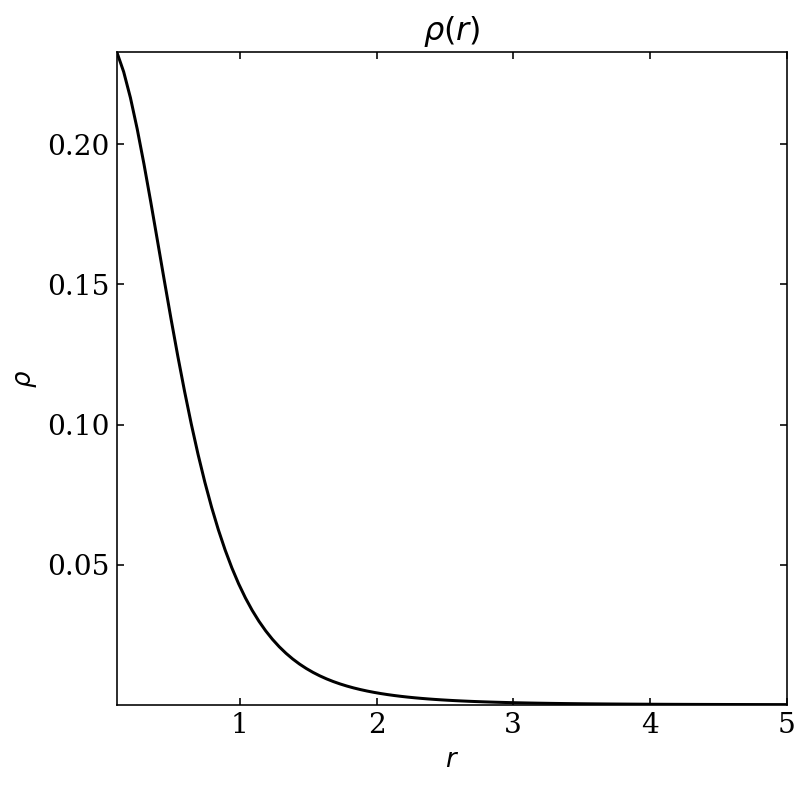

In [62]:
plt.figure(figsize = (6,6))
plt.plot(rs_grid, rho_theor, c='k')
plt.title(r"$\rho(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel(r"$\rho$", fontsize=13);
plt.show()

In [63]:
def density_estimator(r_min, r_max, r_t): 
    
    V = 4/3 * np.pi * (r_max**3 - r_min**3)
    N_particles = len(r_t[r_t < r_max]) - len(r_t[r_t < r_min])
    M_within = N_particles * m
    
    return M_within / V

In [64]:
R = [0.1, 0.2, 0.5, 0.9, 1, 1.5, 2, 3, 4, 5]

rho_0 = []

for i in range(0, len(R) -1):
    
    rho_0.append(density_estimator(R[i], R[i+1], rays))

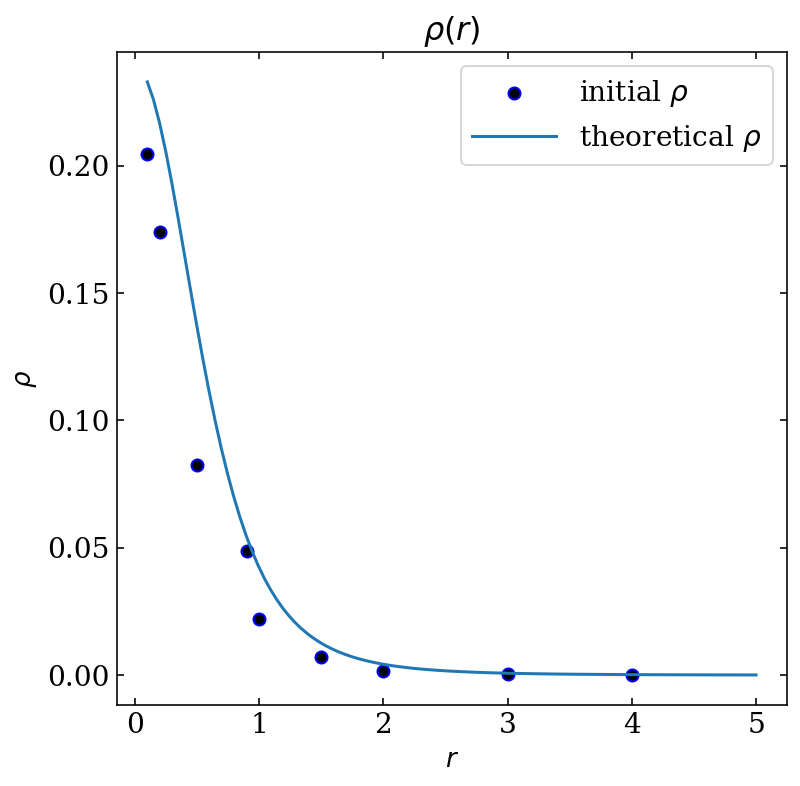

In [66]:
plt.figure(figsize = (6,6))
plt.scatter(R[:-1], rho_0, c='k', label=r'initial $\rho$')
plt.plot(rs_grid, rho_theor, c='C0', label=r'theoretical $\rho$')
plt.title(r"$\rho(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel(r"$\rho$", fontsize=13)
plt.legend()
plt.margins(0.05, 0.05)
plt.show()

### Computing the density of the shells at a given time $t$:

In [85]:
def find_radii_t(particle_index):
    
    r_t = []
    
    for t in range(0, len(Time)):
        
        r_t.append(np.sqrt(_list[particle_index, :3, t][0]**2 + _list[particle_index, :3, t][1]**2 + _list[particle_index, :3, t][1]**2))
        
    return r_t

In [95]:
radii_i = [find_radii_t(i) for i in range(0, N)]

Select a randomical time index and evaluate the density:

In [145]:
t_index = np.random.randint(0, len(Time), 5)
print(t_index)

[13 97 66  0 64]


In [163]:
rho_t = []

for t_i in t_index:
    
    support_i = [] # terrible way of programming this part (need check!)
    
    for i in range(0, len(R)-1):
        
        support_i.append(density_estimator(R[i], R[i+1], np.array(radii_i).T[t_i]))
        
    rho_t.append(support_i)

In [164]:
np.array(rho_t).shape

(5, 9)

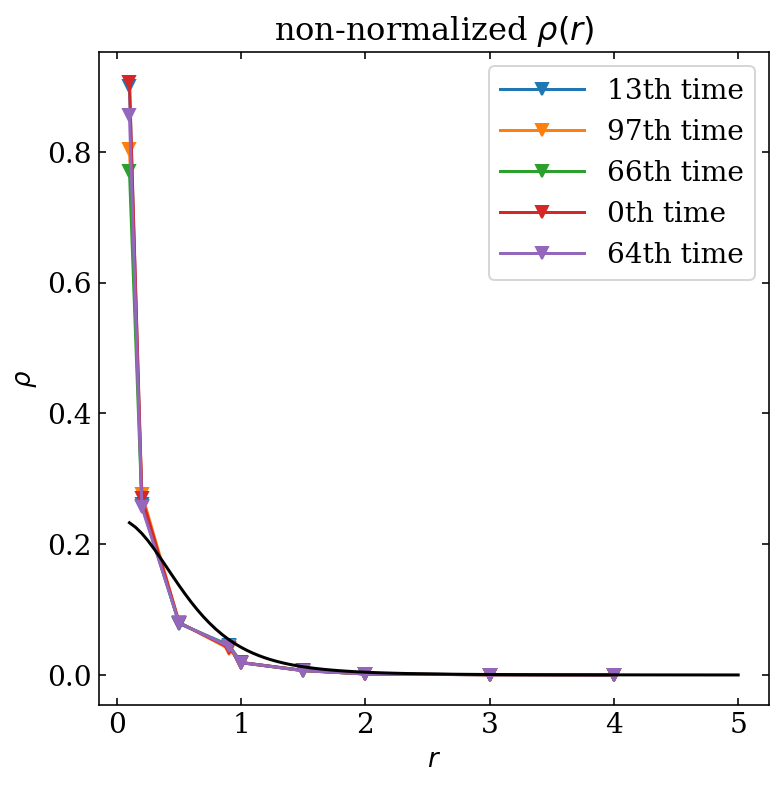

In [178]:
plt.figure(figsize = (6,6))
    
for i in range(0, len(t_index)):
    plt.plot(R[:-1], rho_t[i][:], marker='v', label=f'{t_index[i]}th time')
    
plt.title(r"non-normalized $\rho(r)$", fontsize=16)
plt.xlabel(r"$r$", fontsize=13)
plt.ylabel(r"$\rho$", fontsize=13)
plt.margins(0.05, 0.05)
plt.legend()
plt.show()

### Lagrangian radius evolution in time - stability check

The Lagrangian radius is the radius from the centre at which we find 80% of the entire mass of our distribution. If the sphere is stable, then this quantity should be a constant. We decided to see how close we are to the actual radius 'fixed' at the beginning. We then evaluate the absolute deviation and derive the relative error. 

In [180]:
b_2 = []
b_4 = []
b_6 = []
b_8 = []

for i in range(len(Time)):
    
    a = np.sort(np.array(radii_i).T[i])
    
    mask = a < np.quantile(a,0.2)
    b_2.append(np.max(a[mask]))
    
    mask = a < np.quantile(a,0.4)
    b_4.append(np.max(a[mask]))
    
    mask = a < np.quantile(a,0.6)
    b_6.append(np.max(a[mask]))
    
    mask = a < np.quantile(a,0.8)
    b_8.append(np.max(a[mask]))

In [181]:
# to find the lagrangian radius from theory

def lagr_th(b, quantile): 
    rad3_cb3 = (quantile * b**3)**(1/3)
    return rad3_cb3 / (1 - 1 / b**2 * rad3_cb3**2)**(1/2)

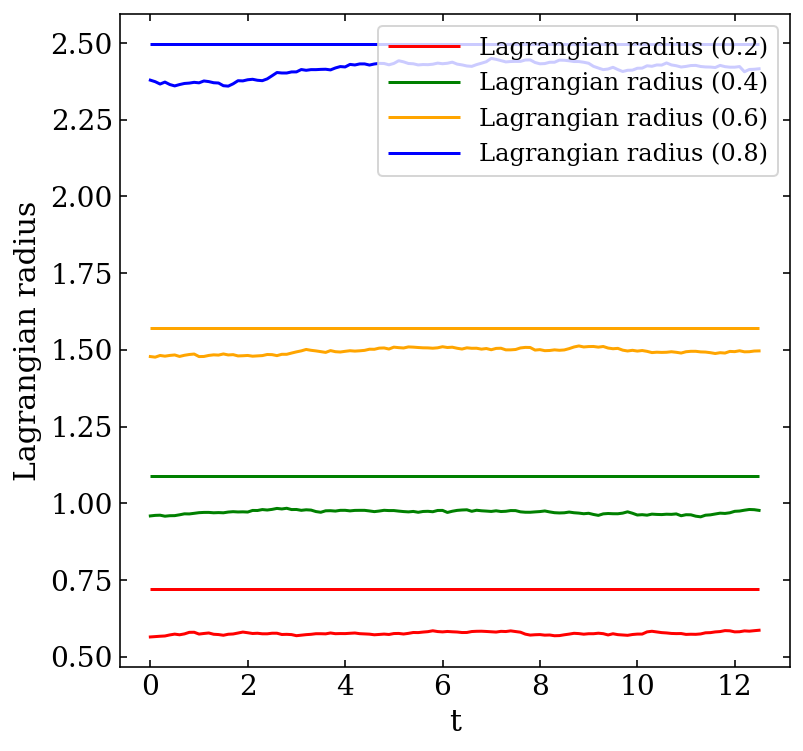

In [189]:
plt.figure(figsize=(6, 6))

c = ['red', 'green', 'orange', 'blue']

plt.plot(Time, b_2, 'red')
plt.plot(Time, b_4,'green')
plt.plot(Time, b_6, 'orange')
plt.plot(Time, b_8, 'blue')

plt.rcParams['figure.figsize']=[8,6]
plt.rcParams['font.size']=10

for j, i in zip([0.2, 0.4, 0.6, 0.8], range(0, 4)):
    
    plt.hlines(lagr_th(b, j), 0, np.max(Time), label=f'Lagrangian radius ({j})', color=c[i])
    

plt.ylabel("Lagrangian radius",fontsize=15)
plt.xlabel("t", fontsize=15)
plt.legend(loc='best', frameon = True, fontsize=12)
plt.margins(0.05, 0.05)
plt.show()

In [190]:
sigma_r = {}

for b_ in [b_2, b_4, b_6, b_8]:

    sigma_r[f"{b_}"] = [np.abs(lagr_th(b, 0.8) - b_[i])/lagr_th(b, 0.8) for i in range(0, len(Time))]

Here we plot the relative error with respect to the $\textit{ideal}$ Lagrangian radius:

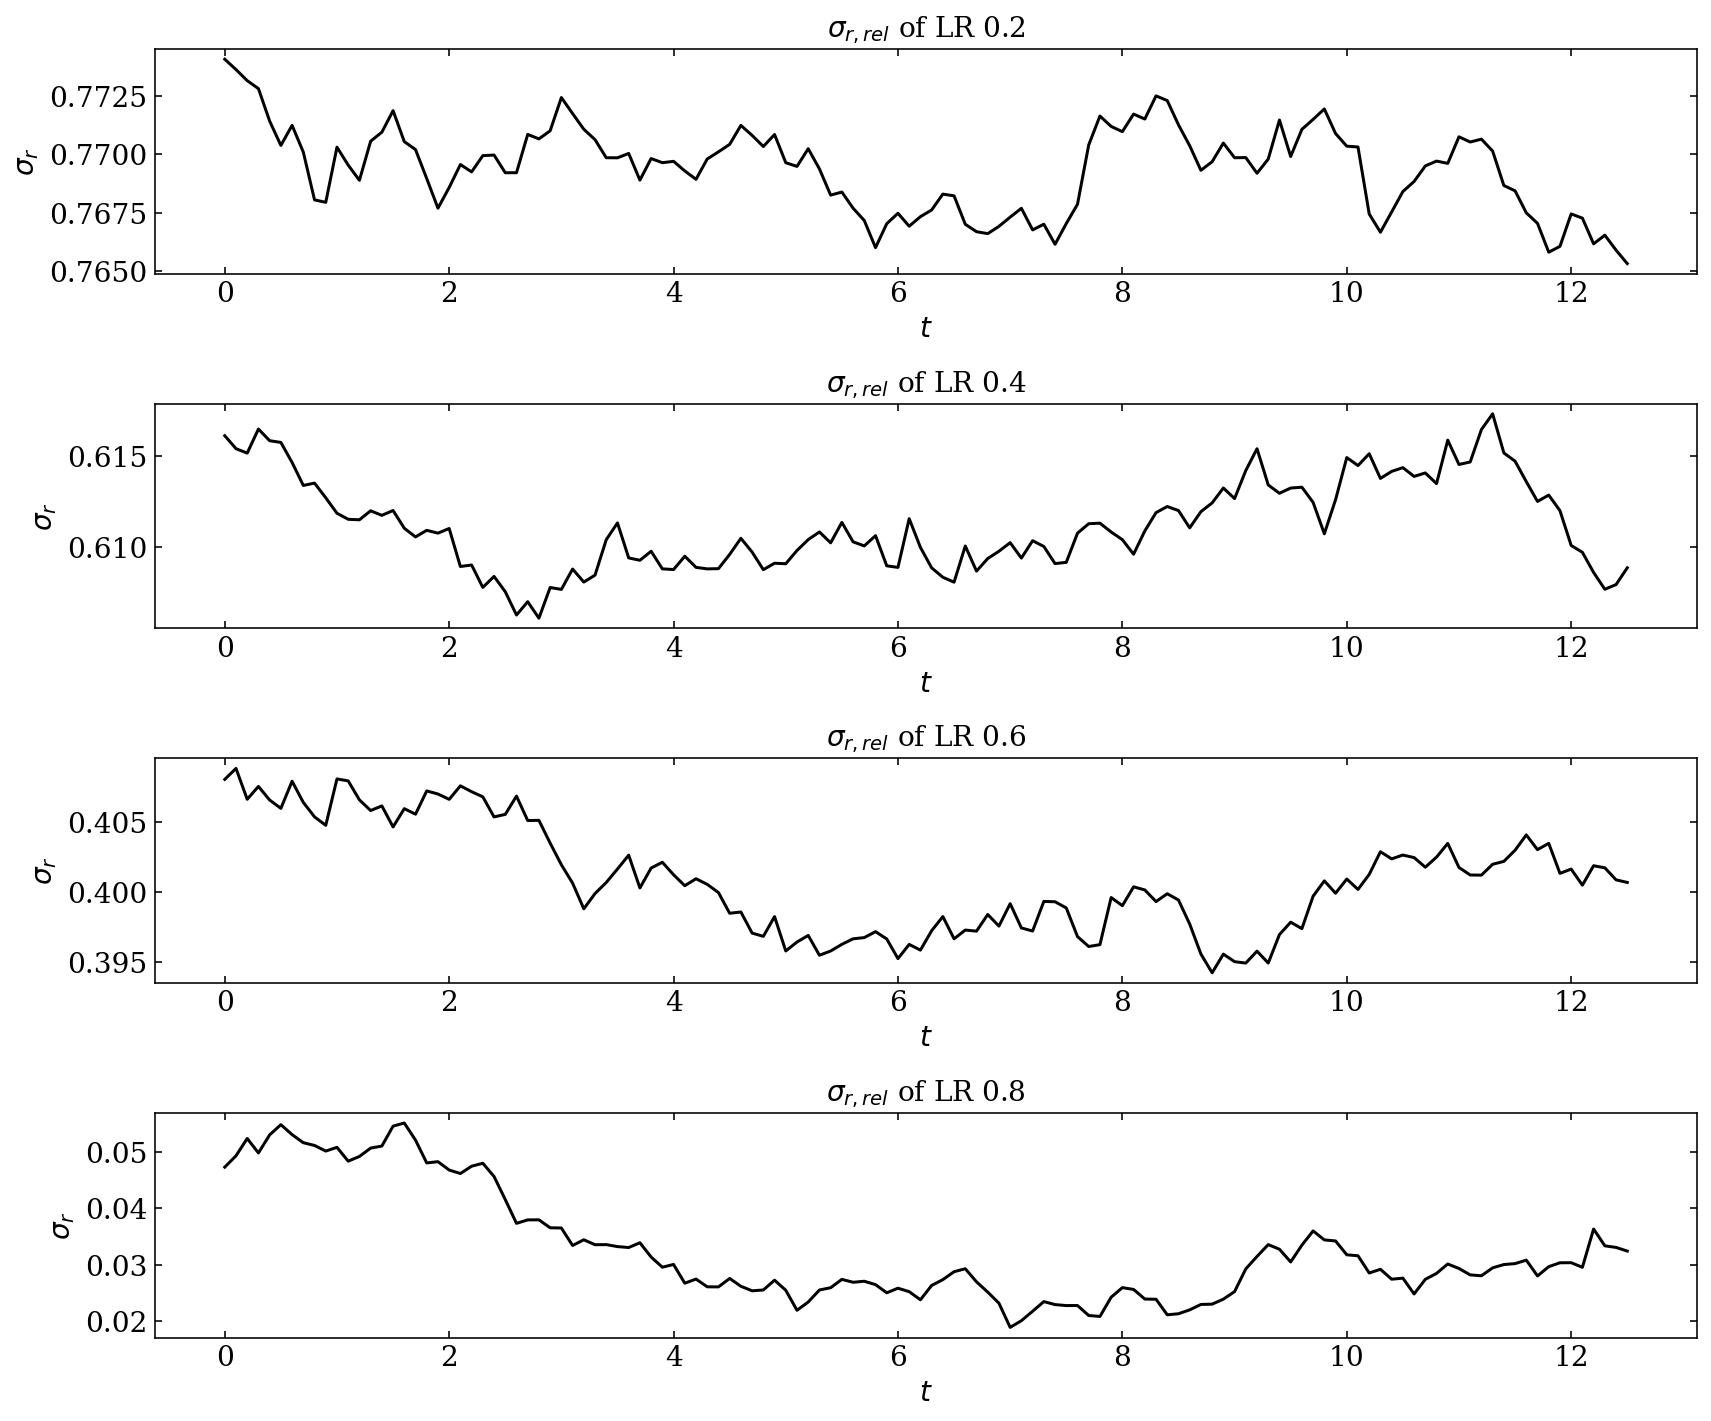

In [193]:
fig, ax = plt.subplots(4, figsize=(12, 10))

for i, b_, index in zip(range(0, 4), [b_2, b_4, b_6, b_8], [0.2, 0.4, 0.6, 0.8]): 

    ax[i].plot(Time, sigma_r[f"{b_}"], c='black')
    ax[i].set_ylabel("$\sigma_{r}$")
    ax[i].set_xlabel("$t$")
    ax[i].set_title(f"$\sigma_{{r, rel}}$ of LR {index}")
    ax[i].margins(0.05, 0.05)

plt.tight_layout()
plt.show()

There is a very large error associated to the lagrangian radius, I am quite sure that could be because I took the distances with respect to the centre and not the centre of mass, which is changing position over time. 